# Exploratory Data Analysis

So until now, we have not idea whether all our efforts are gonna be invain or not; But by doing the analysis here, we will know with high confidence whether the data is useful or not.

We do this by analysing the followings:
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Load the cleaned data

In [180]:
import pandas as pd

data = pd.read_csv('saves/cleaned_transcripts_df.csv', index_col = 0)
data

,Transcript
Lousic C.K.,intro fade the music out let roll hold there ...
Dave Chappelle,this be dave he tell dirty joke for a living t...
Ricky Gervais,hello hello how you do great thank you wow cal...
Bo Burham,bo what old macdonald have a farm e I e I o an...
Bill Burr,all right thank you thank you very much thank ...
Jim Jefferies,lady and gentleman please welcome to the stage...
John Mulaney,armed with boyish charm and a sharp wit the fo...
Hasan Minhaj,what be up davis what be up I be home I have t...
Ali Wong,lady and gentleman please welcome to the stage...
Anthony Jeselnik,thank you thank you thank you san francisco th...


## Vectorize the data

In [181]:
# Imports
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Vectorize
vectorizer = CountVectorizer(stop_words = 'english')
vectorized_data = vectorizer.fit_transform(data['Transcript'])

# Convert to DataFrame
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns = vectorizer.get_feature_names())
vectorized_df.index = data.index
vectorized_df

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,...,zealand,zee,zen,zeppelin,zero,zillion,zombie,zone,zoo,éclair
Lousic C.K.,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
Dave Chappelle,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ricky Gervais,0,0,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,1,0
Bo Burham,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Bill Burr,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,2,1,0,0
Jim Jefferies,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
Hasan Minhaj,0,0,0,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
Ali Wong,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
Anthony Jeselnik,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0


## Save vectorized data

In [182]:
vectorized_df.to_csv('saves/vectorized_transcripts_df.csv')

## Analysis

### Most Common Words

In [183]:
vectorized_df = vectorized_df.transpose()

In [184]:
top_words = {}

for column in vectorized_df.columns:
    tokens = vectorized_df[column]
    tokens = tokens.sort_values(ascending = False).head(30)    
    
    top_words[column] = tokens
    print(column + ':\n -', ', '.join(list(tokens.index[:15])))

Lousic C.K.:
 - like, just, know, life, say, thing, people, tit, na, gon, kid, cause, good, think, shit
Dave Chappelle:
 - like, know, say, just, shit, fuck, people, man, time, ahah, black, come, look, guy, good
Ricky Gervais:
 - say, right, like, just, know, ve, yeah, thing, fucking, joke, think, people, year, little, day
Bo Burham:
 - know, like, think, love, bo, just, say, stuff, repeat, want, yeah, right, ve, slut, eye
Bill Burr:
 - like, just, right, know, gon, na, fucking, yeah, shit, come, think, guy, want, say, make
Jim Jefferies:
 - like, right, fucking, say, know, just, come, think, fuck, ve, thing, gun, people, oh, day
John Mulaney:
 - like, know, say, just, clinton, walk, right, time, think, kid, little, hey, look, mom, day
Hasan Minhaj:
 - like, know, dad, say, want, just, look, love, ve, time, hasan, right, come, walk, life
Ali Wong:
 - like, know, just, shit, na, gon, woman, ok, lot, come, time, day, husband, oh, wanna
Anthony Jeselnik:
 - say, joke, like, know, guy, thi

#### Remove the most commen words

Common words seem meaningless in our analysis since everyone uses them. So they won't provide much information.

In [185]:
top_all_words = []

for column in vectorized_df.columns:
    words = list(top_words[column].index)
    
    for word in words: top_all_words.append(word)

In [186]:
# Imports
from collections import Counter

# Find words that are common between atleast 6 of the comedians
add_stop_words = [word for word, count in Counter(top_all_words).most_common() if count > 7]
add_stop_words

['like',
 'just',
 'know',
 'say',
 'people',
 'right',
 'think',
 'time',
 'come',
 'look',
 'fuck',
 'want',
 'thing',
 'na',
 'gon',
 'guy',
 'make']

#### Load the cleaned data

In [187]:
clean_df = pd.read_csv('saves/cleaned_transcripts_df.csv', index_col = 0)
clean_df

,Transcript
Lousic C.K.,intro fade the music out let roll hold there ...
Dave Chappelle,this be dave he tell dirty joke for a living t...
Ricky Gervais,hello hello how you do great thank you wow cal...
Bo Burham,bo what old macdonald have a farm e I e I o an...
Bill Burr,all right thank you thank you very much thank ...
Jim Jefferies,lady and gentleman please welcome to the stage...
John Mulaney,armed with boyish charm and a sharp wit the fo...
Hasan Minhaj,what be up davis what be up I be home I have t...
Ali Wong,lady and gentleman please welcome to the stage...
Anthony Jeselnik,thank you thank you thank you san francisco th...


#### Re-vectorize the clean data

In [188]:
# Imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Update the stop words list
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


vectorizer = CountVectorizer(stop_words = stop_words)
data_cv = vectorizer.fit_transform(clean_df['Transcript'])
new_vectorized_df = pd.DataFrame(data_cv.toarray(), columns = vectorizer.get_feature_names())
new_vectorized_df.index = clean_df.index

#### Save the new vectorized data

In [189]:
new_vectorized_df.to_csv('saves/stopwords_vectorized_df.csv')

#### Wordclouds

In [190]:
# Imports
from wordcloud import WordCloud

wc = WordCloud(
    stopwords = stop_words,
    background_color = "white",
    colormap = "Dark2",
    max_font_size = 150,
    random_state = 42
)

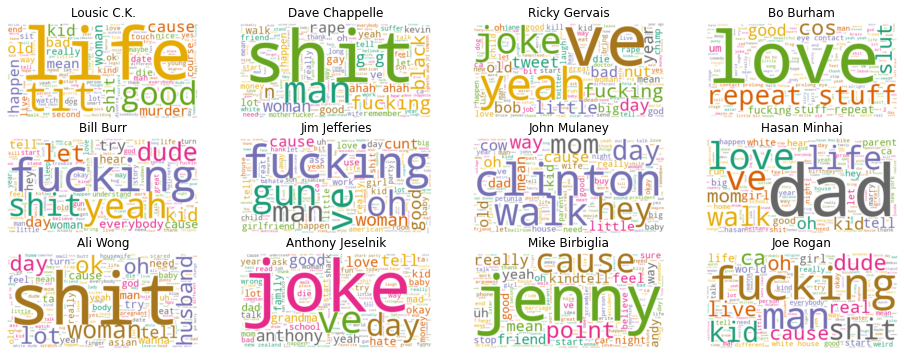

In [191]:
# Imports
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, comedian in enumerate(clean_df.index):
    wc.generate(clean_df['Transcript'][index])
    
    plt.subplot(3, 4, index + 1)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.title(comedian)

plt.show()